# 5310: Methods in Empirical Analysis Task # 1
# Exploratory data analysis of Bollywood Actors Rating in Python.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**What data are we exploring today ?**



I have considered Bollywood actors rating for data analysis. I believe that it gives more valuable insights for various stakeholders, producers, directors, marketers and actors. The data-set can be downloaded from [here](https://www.kaggle.com/datasets/mitesh58/bollywood-movie-dataset). This data set includes, actorId, moviCount, ratingSum, googleHits, normalizedGoogleRank, normalizedMovieRank, normalizedRating. lets explore the dataset and perform the modeling.

## 1. Imported required libraries

I have imported the below libraries which are used to perform EDA.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

## 2. Loaded dataset

In [ ]:
#loading the dataset
df1 = pd.read_csv("/content/drive/MyDrive/BollywoodActorRanking.csv")
df1.head(5)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716


In [ ]:
df1.tail(5)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
296,669,Achint Kaur,4,80,1.0,0,NaN,1.00
297,670,Yuvika Chaudhry,5,100,1.0,0,NaN,1.00
298,671,Pankaj Berry,5,100,1.0,0,NaN,1.00
299,672,Varun Dhawan,0,0,NaN,0,NaN,4.74
300,673,Nargis Fakhri,0,0,NaN,0,NaN,4.80


## 3. Checking the types of data

In [ ]:
df1.dtypes

actorId                   int64
actorName                object
movieCount                int64
ratingSum                 int64
normalizedMovieRank     float64
googleHits                int64
normalizedGoogleRank    float64
normalizedRating        float64
dtype: object

In [ ]:
df1.shape

(301, 8)

#Data Cleaning
###Check for missing values


In [ ]:
print(df1.isnull().sum())


actorId                   0
actorName                 0
movieCount                0
ratingSum                 0
normalizedMovieRank       2
googleHits                0
normalizedGoogleRank    112
normalizedRating          0
dtype: int64


## 4. Removed duplicate rows from the dataset.

In [ ]:
duplicate_rows_df1 = df1[df1.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df1.shape)

number of duplicate rows:  (0, 8)


In [ ]:
df1.count()

actorId                 301
actorName               301
movieCount              301
ratingSum               301
normalizedMovieRank     299
googleHits              301
normalizedGoogleRank    189
normalizedRating        301
dtype: int64

In [ ]:
df1.shape

(301, 8)

Total dataset has 301 rows and 8 columns, after removing the duplicates, the dataset has 189 rows and 8 columns.

In [ ]:
df1 = df1.drop_duplicates()
df1.head(5)

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716


In [ ]:
df1.count()

actorId                 301
actorName               301
movieCount              301
ratingSum               301
normalizedMovieRank     299
googleHits              301
normalizedGoogleRank    189
normalizedRating        301
dtype: int64

## 5. Dropped missing/null values.

In [ ]:
print(df1.isnull().sum())

actorId                   0
actorName                 0
movieCount                0
ratingSum                 0
normalizedMovieRank       2
googleHits                0
normalizedGoogleRank    112
normalizedRating          0
dtype: int64


In [ ]:
df1 = df1.dropna()
df1.count()

actorId                 189
actorName               189
movieCount              189
ratingSum               189
normalizedMovieRank     189
googleHits              189
normalizedGoogleRank    189
normalizedRating        189
dtype: int64

Removed all the rows which has the Null or N/A values.

In [ ]:
print(df1.isnull().sum())

actorId                 0
actorName               0
movieCount              0
ratingSum               0
normalizedMovieRank     0
googleHits              0
normalizedGoogleRank    0
normalizedRating        0
dtype: int64


## Data Exploration
#### Summary Statistics



In [ ]:
df1.describe()

,actorId,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
count,189.000000,189.000000,189.000000,189.000000,1.890000e+02,189.000000,189.000000
mean,482.566138,13.703704,578.201058,2.987354,5.959299e+05,2.533937,3.576815
std,69.269149,9.086876,496.971618,1.653698,7.564603e+05,1.951501,1.797680
min,373.000000,4.000000,100.000000,1.000000,1.330000e+03,1.000000,1.569930
25%,422.000000,8.000000,250.000000,1.827760,9.540000e+04,1.242680,2.313460
50%,479.000000,11.000000,380.000000,2.565220,2.490000e+05,1.638930,2.938940
75%,540.000000,17.000000,740.000000,3.746660,7.640000e+05,2.967520,4.336710
max,608.000000,54.000000,2950.000000,10.000000,3.490000e+06,10.000000,10.000000


In [ ]:
df1.max()
#Zayed Khan has the max value in each column

actorId                        608
actorName               Zayed Khan
movieCount                      54
ratingSum                     2950
normalizedMovieRank           10.0
googleHits                 3490000
normalizedGoogleRank          10.0
normalizedRating              10.0
dtype: object

In [ ]:
df1.min()
#Amir Khan has the min value in each column

actorId                        373
actorName               Aamir Khan
movieCount                       4
ratingSum                      100
normalizedMovieRank            1.0
googleHits                    1330
normalizedGoogleRank           1.0
normalizedRating           1.56993
dtype: object

In [ ]:
Data_Normalized_Rating=df1.nlargest(10,"normalizedRating")
Data_Normalized_Rating

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716
5,378,Hrithik Roshan,16,1120,5.89130,2650000,7.83298,8.25194
6,379,Priyanka Chopra,36,1990,4.45109,3130000,9.07128,8.13686
7,380,Kareena Kapoor,37,2200,4.86016,2940000,8.58112,8.09065
8,381,Ranbir Kapoor,11,890,6.95850,1860000,5.79496,7.69864
9,382,Kajol,6,450,6.38043,1780000,5.58858,7.25156


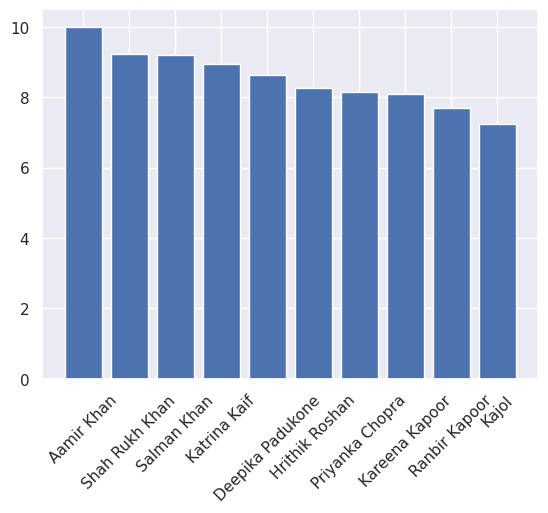

In [ ]:
plt.bar(Data_Normalized_Rating["actorName"],Data_Normalized_Rating["normalizedRating"])
plt.xticks(rotation=45)
plt.show()
#Below Bar graph shows the Normalised Rating

In [ ]:
Data_highest_films=df1.nlargest(10,"movieCount")
Data_highest_films

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
18,391,Akshay Kumar,54,2950,4.38768,1960000,6.05294,6.38048
14,387,Ajay Devgn,49,2320,3.67524,2570000,7.62660,6.87132
11,384,Amitabh Bachchan,48,2140,3.40489,2770000,8.14256,7.01130
36,409,Sanjay Dutt,43,1740,3.00202,1560000,5.02103,5.00264
83,456,Sunil Shetty,42,1530,2.60714,560000,2.44125,3.30729
7,380,Kareena Kapoor,37,2200,4.86016,2940000,8.58112,8.09065
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
6,379,Priyanka Chopra,36,1990,4.45109,3130000,9.07128,8.13686
77,450,Anupam Kher,36,1310,2.60326,657000,2.69148,3.44770
31,404,Abhishek Bachchan,34,1770,4.13619,1260000,4.24709,5.20794


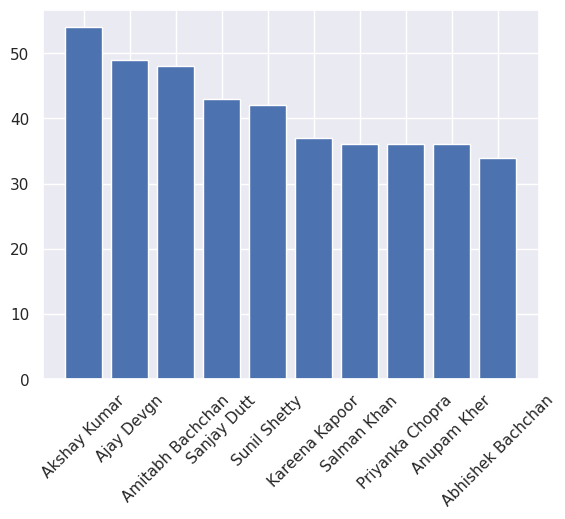

In [ ]:
plt.bar(Data_highest_films["actorName"],Data_highest_films["movieCount"])
plt.xticks(rotation=45)
plt.show()
#Below Bar graph shows the number of films

In [ ]:
Data_highest_google_hits=df1.nlargest(10,"googleHits")
Data_highest_google_hits

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
2,375,Salman Khan,36,2340,5.40217,3490000,10.00000,9.20821
6,379,Priyanka Chopra,36,1990,4.45109,3130000,9.07128,8.13686
4,377,Deepika Padukone,16,1080,5.64674,3000000,8.73591,8.62716
7,380,Kareena Kapoor,37,2200,4.86016,2940000,8.58112,8.09065
11,384,Amitabh Bachchan,48,2140,3.40489,2770000,8.14256,7.01130
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
5,378,Hrithik Roshan,16,1120,5.89130,2650000,7.83298,8.25194
10,383,John Abraham,27,1370,4.00725,2610000,7.72979,7.11935
14,387,Ajay Devgn,49,2320,3.67524,2570000,7.62660,6.87132
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000


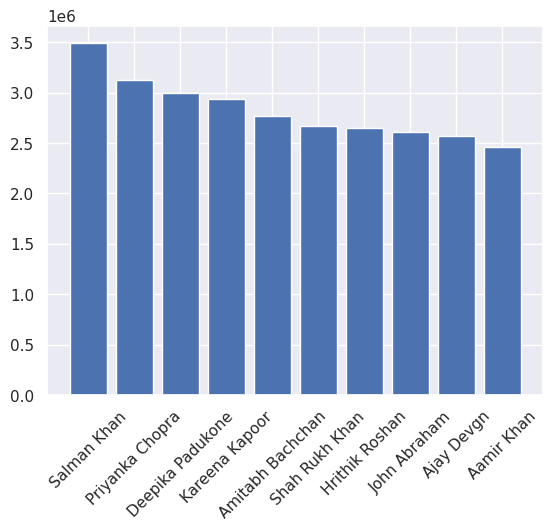

In [ ]:
plt.bar(Data_highest_google_hits["actorName"],Data_highest_google_hits["googleHits"])
plt.xticks(rotation=45)
plt.show()
#From the below Bar graph, we can see Salman Khan is most searched hero in the Google

In [ ]:
Data_highest_Movie_Rank=df1.nlargest(10,"normalizedMovieRank")
Data_highest_Movie_Rank

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
15,388,Asin,5,560,10.00000,35900,1.08918,6.75012
0,373,Aamir Khan,11,1170,9.44862,2460000,7.34283,10.00000
3,376,Katrina Kaif,17,1640,8.48082,2120000,6.46570,8.94852
12,385,Sonakshi Sinha,8,730,7.97011,960000,3.47316,6.95192
1,374,Shah Rukh Khan,23,2000,7.55009,2670000,7.88458,9.22674
13,386,Alia Bhatt,4,340,7.35870,1190000,4.06651,6.94162
8,381,Ranbir Kapoor,11,890,6.95850,1860000,5.79496,7.69864
9,382,Kajol,6,450,6.38043,1780000,5.58858,7.25156
19,392,Anushka Sharma,7,500,6.03106,1320000,4.40188,6.37610
5,378,Hrithik Roshan,16,1120,5.89130,2650000,7.83298,8.25194


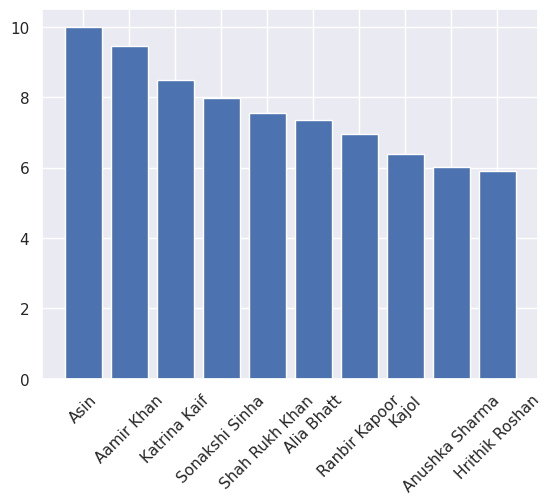

In [ ]:
plt.bar(Data_highest_Movie_Rank["actorName"],Data_highest_Movie_Rank["normalizedMovieRank"])
plt.xticks(rotation=45)
plt.show()
#From the below Bar graph, Asin is the least actress who has done less movies. However, the movies she has acted are hit. Next in the rank is Amir Khan.

In [ ]:
Data_Normalized_Rating=df1.nsmallest(10,"normalizedRating")
Data_Normalized_Rating

,actorId,actorName,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
235,608,Snehal Dabi,7,140,1.00000,1330,1.00000,1.56993
234,607,Nassar Abdulla,6,120,1.00000,7290,1.01538,1.57869
233,606,Rajit Kapoor,6,120,1.00000,15900,1.03759,1.59135
232,605,Sudesh Berry,6,120,1.00000,16100,1.03810,1.59165
231,604,Milind Gunaji,10,200,1.00000,24300,1.05926,1.60370
230,603,Ishrat Ali,5,100,1.00000,68100,1.17225,1.66810
227,600,Kurush Deboo,6,130,1.16304,8340,1.01808,1.67316
226,599,Govind Namdeo,6,130,1.16304,17900,1.04275,1.68721
225,598,Vikram Gokhale,7,150,1.13975,31900,1.07886,1.69452
224,597,Farooq Shaikh,7,140,1.00000,94000,1.23907,1.70618


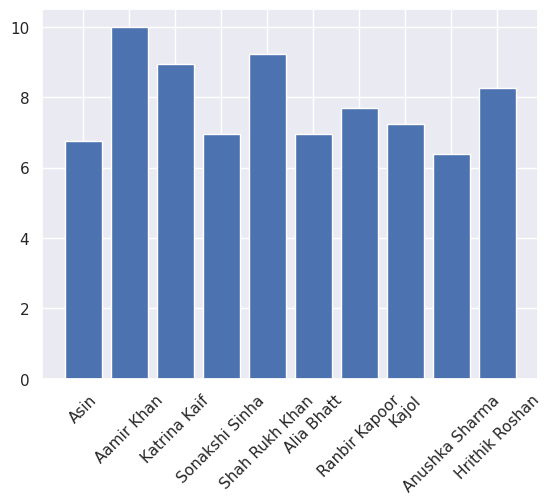

In [ ]:
plt.bar(Data_highest_Movie_Rank["actorName"],Data_highest_Movie_Rank["normalizedRating"])
plt.xticks(rotation=45)
plt.show()
#Below bar graph shows the worst actors of Rating

##boxplots

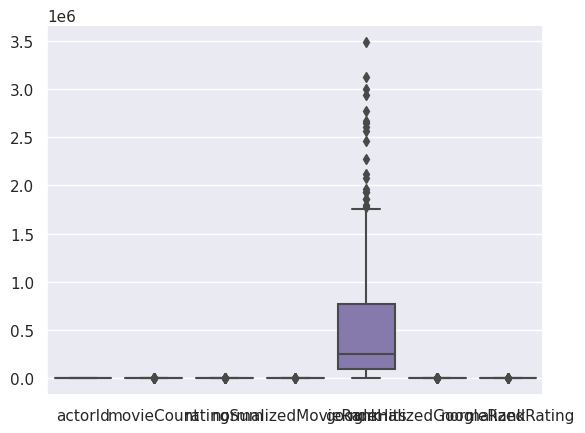

In [ ]:
sns.boxplot(data=df1)
plt.show()

<Axes: xlabel='ratingSum'>

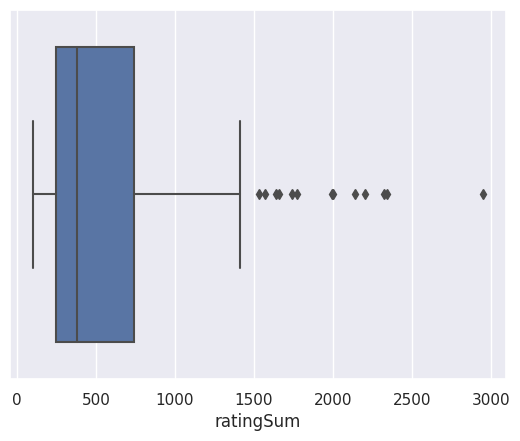

In [ ]:
sns.boxplot(x=df1['ratingSum'])

<Axes: xlabel='googleHits'>

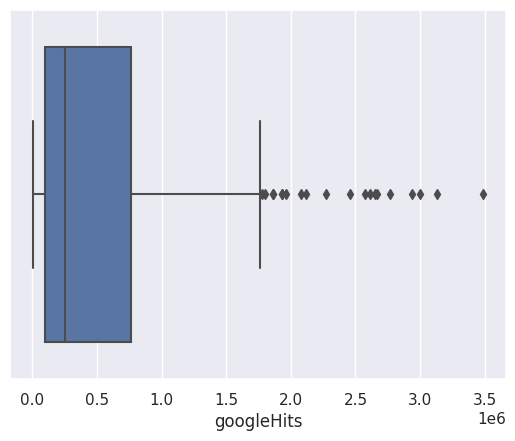

In [ ]:
sns.boxplot(x=df1['googleHits'])

<Axes: xlabel='movieCount'>

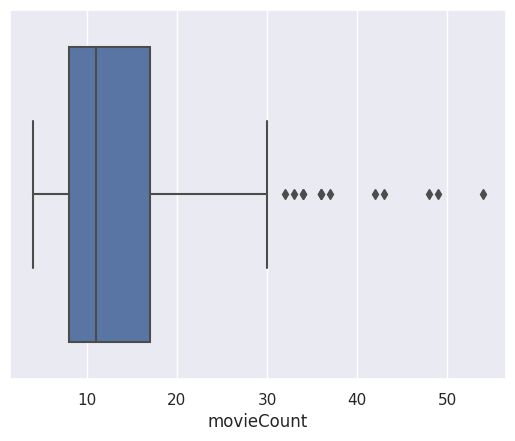

In [ ]:
sns.boxplot(x=df1['movieCount'])

In [ ]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

actorId                    118.00000
movieCount                   9.00000
ratingSum                  490.00000
normalizedMovieRank          1.91890
googleHits              668600.00000
normalizedGoogleRank         1.72484
normalizedRating             2.02325
dtype: float64


<ipython-input-207-e6163f9c21b2>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df1.quantile(0.25)
<ipython-input-207-e6163f9c21b2>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df1.quantile(0.75)


In [ ]:
df = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df1.shape

<ipython-input-208-3171357512d9>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]


(189, 8)

## 6. Plot different features against one another

Histogram


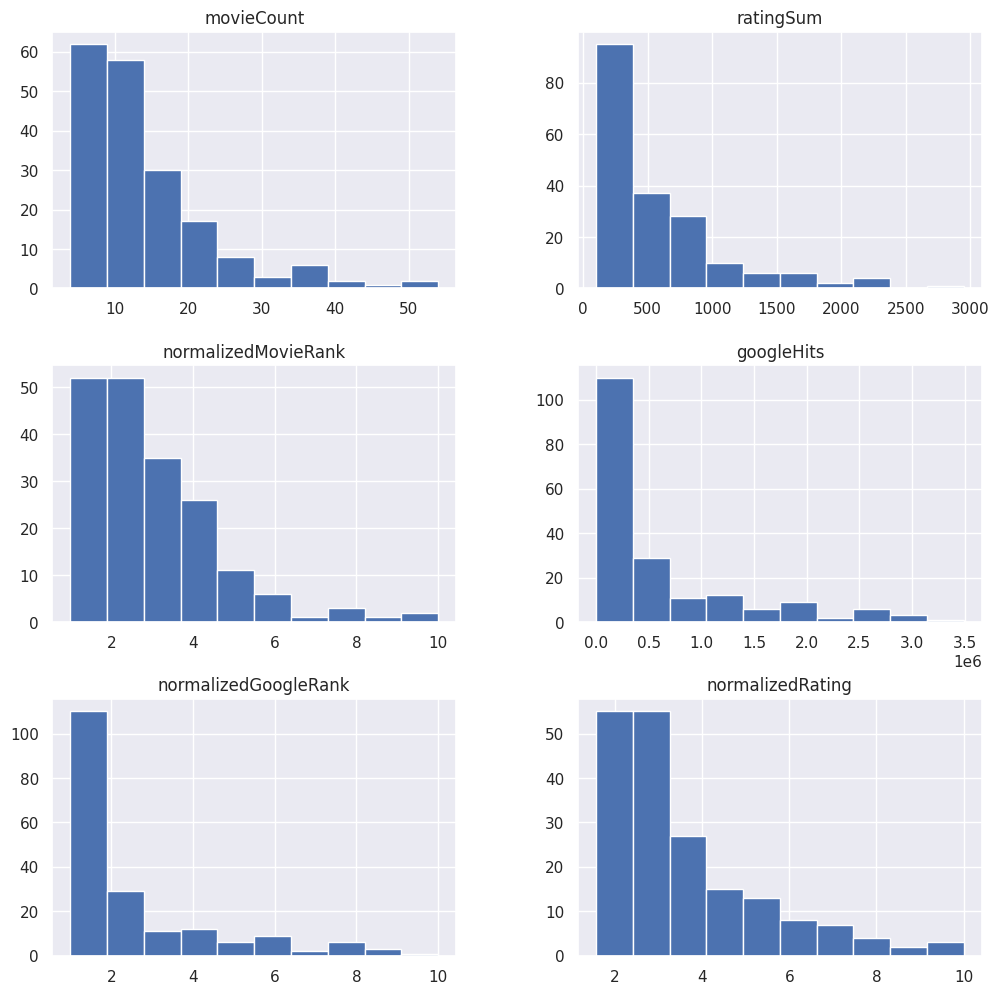

In [ ]:
df1[['movieCount', 'ratingSum', 'normalizedMovieRank', 'googleHits', 'normalizedGoogleRank', 'normalizedRating']].hist(figsize=(12, 12))
plt.show()


From the above histogram graph:
1. movieCount: It shows the distribution of the number of movies each actor has acted.
2. ratingSum: It shows the distribution of the sum of ratings of all movies for each actor.
3. normalizedMovieRank: It will show the distribution of the normalized movie ranks of all the actors.
4. googleHits: It will show the distribution of the number of Google hits for each actor.
5. normalizedGoogleRank: It will show the distribution of the normalized Google ranks of all actors.
6. normalizedRating: It will show the distribution of the normalized ratings of all actors.

Lets compare the between 2 categories. For instance, lets compare popular actors with less popular actors, based on the 'googleHits' and compare it with other categories 'movieCount', 'ratingSum' and 'normalizedMovieRank'.

In [ ]:
ts = df1['googleHits'].quantile(0.75)

In [ ]:
popularactors = df1[df1['googleHits'] > ts]
lesspopular_actors = df1[df1['googleHits'] <= ts]

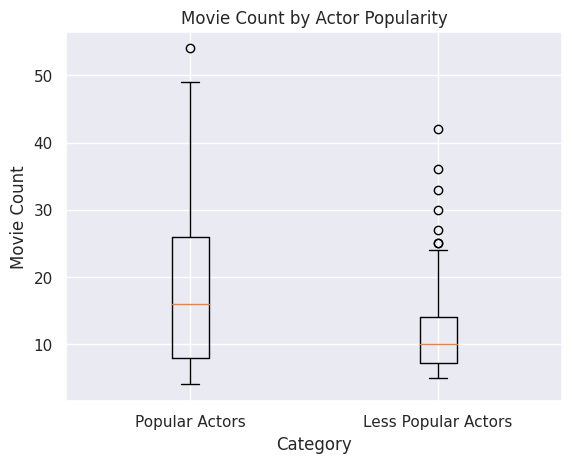

In [ ]:
plt.boxplot([popularactors['movieCount'], lesspopular_actors['movieCount']], labels=['Popular Actors', 'Less Popular Actors'])
plt.xlabel('Category')
plt.ylabel('Movie Count')
plt.title('Movie Count by Actor Popularity')
plt.show()

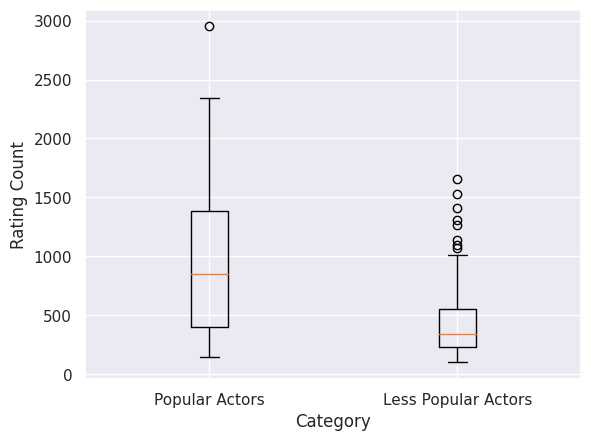

In [ ]:
plt.boxplot([popularactors['ratingSum'], lesspopular_actors['ratingSum']], labels=['Popular Actors', 'Less Popular Actors'])
plt.xlabel('Category')
plt.ylabel('Rating Count')
plt.show()

HeatMap:

<ipython-input-214-6d6cc1ea6c7e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df1.corr()


,actorId,movieCount,ratingSum,normalizedMovieRank,googleHits,normalizedGoogleRank,normalizedRating
actorId,1.000000,-0.385857,-0.620572,-0.812362,-0.728760,-0.728760,-0.876787
movieCount,-0.385857,1.000000,0.901491,0.168419,0.459988,0.459988,0.372892
ratingSum,-0.620572,0.901491,1.000000,0.514323,0.639520,0.639520,0.665318
normalizedMovieRank,-0.812362,0.168419,0.514323,1.000000,0.527705,0.527705,0.850771
googleHits,-0.728760,0.459988,0.639520,0.527705,1.000000,1.000000,0.895362
normalizedGoogleRank,-0.728760,0.459988,0.639520,0.527705,1.000000,1.000000,0.895362
normalizedRating,-0.876787,0.372892,0.665318,0.850771,0.895362,0.895362,1.000000


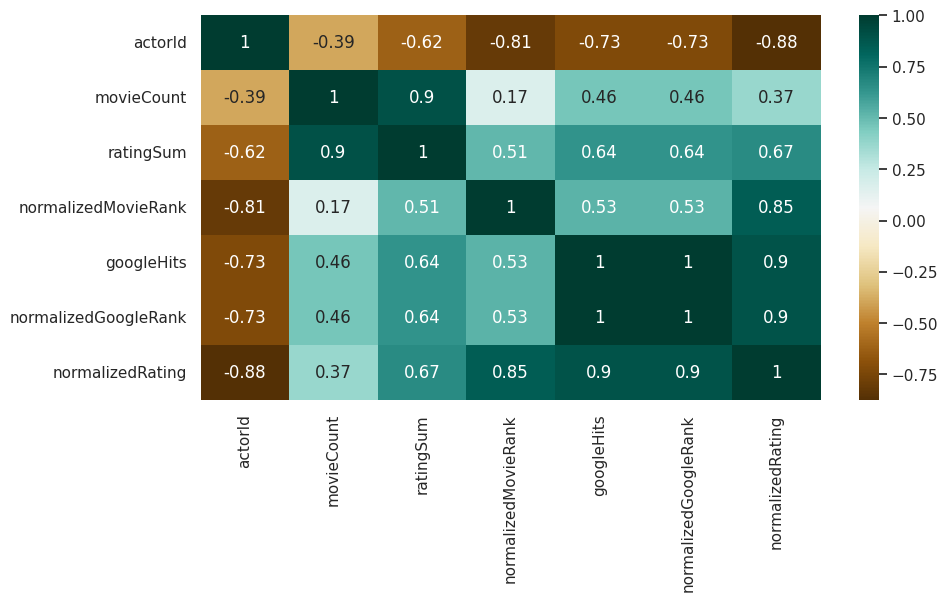

In [ ]:
plt.figure(figsize=(10,5))
c= df1.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

Scatterplot

1. The actorId has a strong negative correlation with normalizedMovieRank (-0.812362) and normalizedRating (-0.876787), indicating that as the actorId increases, both the normalizedMovieRank and normalizedRating tend to decrease.
2. On the other hand, movieCount shows a strong positive correlation with ratingSum (0.901491), actors who have acted in more movies tend to have a higher sum of movie ratings.
3. Additionally, normalizedMovieRank is positively correlated with normalizedRating (0.850771) and googleHits (0.527705), indicating that actors with higher normalized movie ranks tend to have higher normalized ratings and are more popular on Google.
4. Interestingly, googleHits and normalizedGoogleRank are perfectly correlated (1.000000), which is expected as they are two different normalizations of the same underlying data.
5. Lastly, normalizedRating also has a strong positive correlation with googleHits (0.895362) and normalizedGoogleRank (0.895362), indicating that actors with higher normalized ratings tend to be more popular on Google.

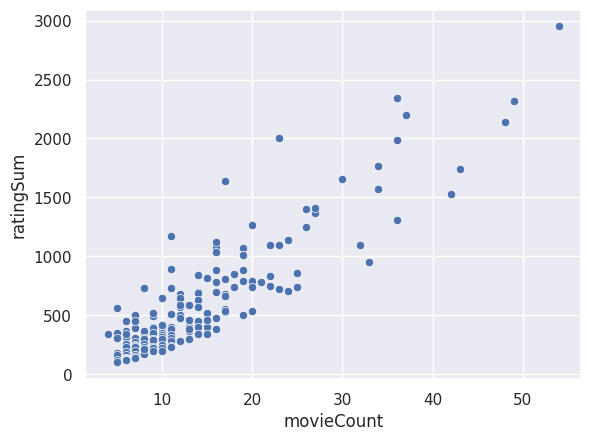

In [ ]:
sns.scatterplot(x='movieCount', y='ratingSum', data=df1)
plt.show()

A scatter plot of movieCount against ratingSum shows an upward trend, indicating that actors who have acted in more movies usually have higher total movie ratings.